In [1]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from simulation.models.single_codon import single_codon
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
palette = sns.diverging_palette(240, 10, n=4)
trna_color_map = {"TTT_charged": palette[0], "TTT_uncharged": palette[1], "ATA_charged": palette[3], "ATA_uncharged": palette[2]}

def read_sim(path_pref, seed_start=1, seed_end=3, seed_incr=1, time_limit=None):
    """ 
    Reads in output for an arbitrary number of simulation trials 
    (with different seeds) and concatenates results into a single
    dataset.
    """
    df_master = pd.read_csv(f"{path_pref}_{seed_start}.tsv", sep="\t")
    df_master["seed"] = str(seed_start)
    for i in range(seed_start+1, seed_end+1):
        tmp = pd.read_csv(f"{path_pref}_{i}.tsv", sep="\t")
        tmp["seed"] = str(i)
        df_master = df_master.append(tmp, ignore_index=True)
    if time_limit is not None:
        df_master = df_master[df_master.time < time_limit]
    return df_master

def tRNA_species_plot(df):
    df_fil = df[(df.species.str.contains("charged"))]
    sns.lineplot(x="time", y="protein", units="seed", hue="species", palette=trna_color_map, estimator=None, data=df_fil)
    
def ribosome_plot(df):
    df_fil = df[(df.species == "__ribosome")]
    sns.lineplot(x="time", y="protein", units="seed", estimator=None, data=df_fil, color="purple")

In [3]:
def get_average_protein(path, perc_good, time, max_seed):
    df_master = pd.read_csv(f"{path}_1.tsv", sep="\t")
    df_master["seed"] = str(1)
    for i in range(2, max_seed+1):
        tmp = pd.read_csv(f"{path}_{i}.tsv", sep="\t")
        tmp["seed"] = str(i)
        df_master = df_master.append(tmp, ignore_index=True)
    
    df_master["time"] = df_master["time"].apply(np.ceil)
    df_master = df_master.loc[df_master['time'] == time].groupby(["species"])["protein"].mean().reset_index()
    df_master["percent_good"] = perc_good
    return df_master

In [11]:
rcParams['figure.figsize'] = [10, 5]

## Initial exploration of a two codon system

Here, I have a two-codon system where one codon is "preferred" and the other is suboptimal. There are actually two parameters that control whether a codon is optimal (relative to another). One is the charging rate of the corresponding tRNA species, and the other is the relative abundance of the corresponding tRNA species. In this series of plots, I keep tRNA abundance fixed, and equivalent for both species. Charging rate is either 100 (preferred) and 10 (unpreferred) or 1000 (preferred) and 100 (unprefered). These windows represent intermediate charging rate values (fixed transcript S plot) that resulted in pools of charged tRNA equilibriating at 40-90%.

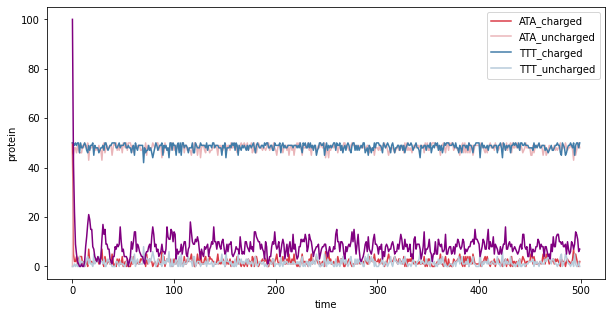

In [13]:
df_master = read_sim("../output/two_codon/two_codon_fixed_transcript_25_50_50_100_10_200_1200_1.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

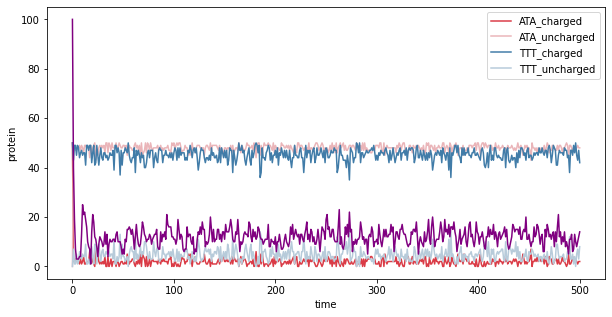

In [14]:
df_master = read_sim("../output/two_codon/two_codon_fixed_transcript_50_50_50_100_10_200_1200_1.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

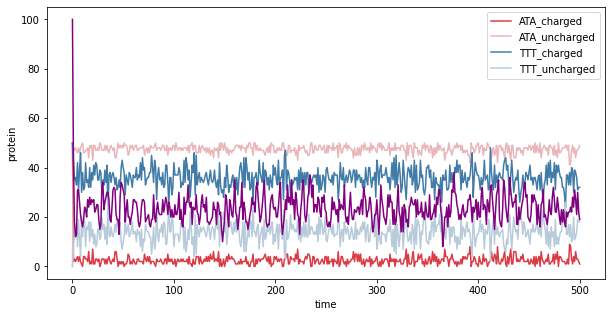

In [15]:
df_master = read_sim("../output/two_codon/two_codon_fixed_transcript_75_50_50_100_10_200_1200_1.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

Top: mRNA consists of 25% preferred codons. Middle: mRNA consists of 50% preferred codons. Bottom: mRNA consists of 75% preferred codons. Slow tRNA (rate=10) charging is so slow that these tRNAs are always depleted (dark red line) regardless of codon use. As preferred codon use increases, corresponding charged tRNA abundances decrease from 100% to 80% of their total (50); note that the abundance decreases more dramatically from middle to bottom than from top to middle. Surprisingly, free ribosomes increase as charged preferred tRNA decreases. 

/home/alexis/projects/tRNA-dynamics/env-dev/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

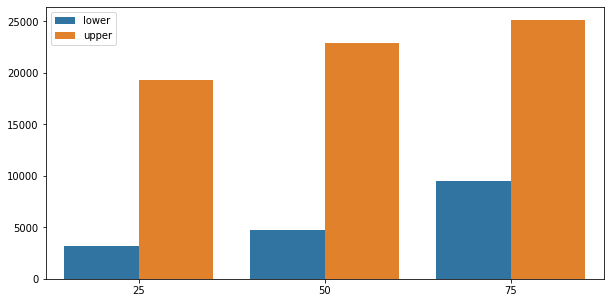

In [16]:
protein = [3167, 4763, 9459, 19296, 22860, 25148]
fraction = ["25", "50", "75", "25", "50", "75"]
hue = ["lower", "lower", "lower", "upper", "upper", "upper"]
sns.barplot(fraction, protein, hue=hue)

Protein abundances for the six conditions (preferred codon fractions 25, 50, and 75 + charging rate 100/10 or 1000/100). For the upper and lower charging rate bounds, protein abundance as a function of preferred codon use is probably sigmoidal (similar to what is seen more clearly when tRNA abundances are varied, rather than charging rate), but I would need to run more simulations to confirm this **(might be worth doing)**

## Varying codon use when tRNA abundances are unequal
In the next series of plots, I again vary codon use (this time more granularly, with fractions 10, 25, 40, 50, 60, 75, 85, 90, 95, and 99, although only 25, 50, 75, 90, and 99 are plotted individually). Here we see a similar trend, where the non-preferred tRNA is depleted until preferred codon use reaches 90%, and preferred tRNAs are depleted more rapidly as preferred codon use increases. Again, free ribosomes increase as preferred codon use increases (**why?**)

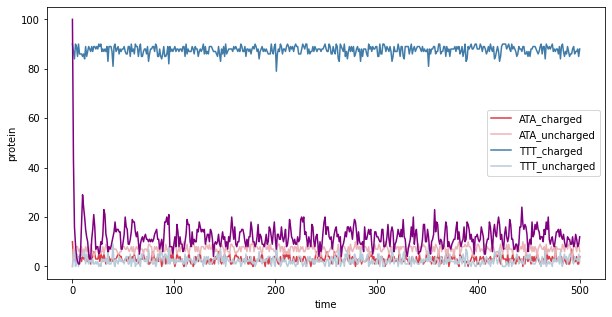

In [17]:
df_master = read_sim("../output/two_codon/two_codon_fixed_transcript_25_90_10_100_100_200_1200_1.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

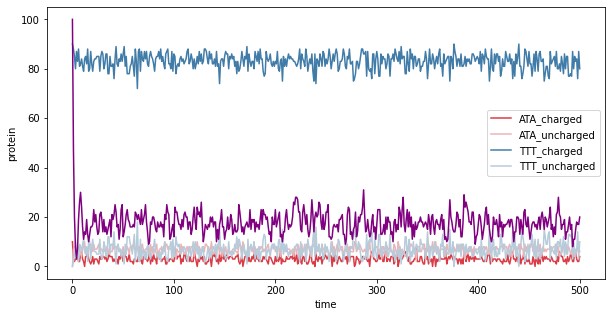

In [18]:
df_master = read_sim("../output/two_codon/two_codon_fixed_transcript_50_90_10_100_100_200_1200_1.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

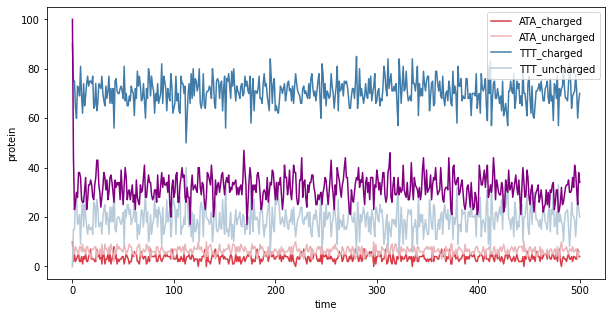

In [20]:
df_master = read_sim("../output/two_codon/two_codon_fixed_transcript_75_90_10_100_100_200_1200_1.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)
#plt.savefig("figures_group_mtg_0128/two_codon.png")

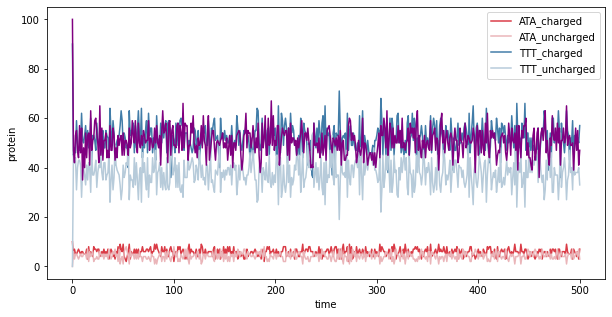

In [22]:
df_master = read_sim("../output/two_codon/two_codon_fixed_transcript_90_90_10_100_100_200_1200_1.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)
#plt.savefig("figures_group_mtg_0128/two_codon2.png")

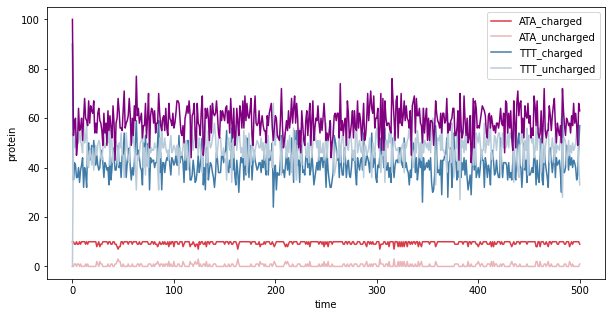

In [23]:
df_master = read_sim("../output/two_codon/two_codon_fixed_transcript_99_90_10_100_100_200_1200_1.0_10000.0", 1, 1, 1, 500)
tRNA_species_plot(df_master)
ribosome_plot(df_master)

In [24]:
fractions = [10, 25, 40, 50, 60, 75, 85, 90, 95, 99]
df_master = None
for frac in fractions:
    path = f"../output/two_codon/two_codon_fixed_transcript_{frac}_90_10_100_100_200_1200_5.0_10000.0"
    tmp = get_average_protein(path, frac, 100, 3)
    if df_master is not None:
        df_master = df_master.append(tmp, ignore_index=True)
    else:
        df_master = tmp
df_master

,species,protein,percent_good
0,ATA_charged,5.500000,10
1,ATA_uncharged,4.500000,10
2,TTT_charged,89.000000,10
3,TTT_uncharged,1.000000,10
4,__proteinX_rbs,193.000000,10
...,...,...,...
65,TTT_charged,47.333333,99
66,TTT_uncharged,42.666667,99
67,__proteinX_rbs,197.333333,99
68,__ribosome,59.333333,99


Text(0, 0.5, 'proteinX counts')

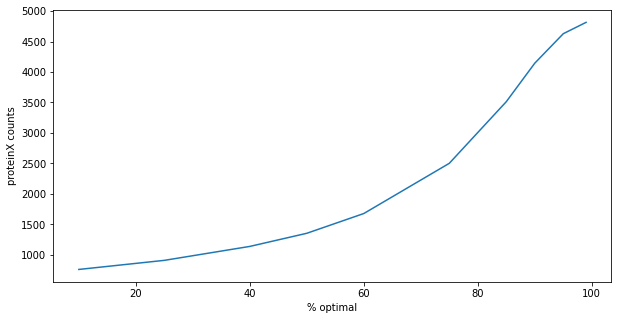

In [26]:
df_fil = df_master[(df_master.species == "proteinX")]
sns.lineplot(x="percent_good", y="protein", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("proteinX counts")
#plt.savefig("figures_group_mtg_0128/two_codon_fractions.png")

Text(0, 0.5, '% charged')

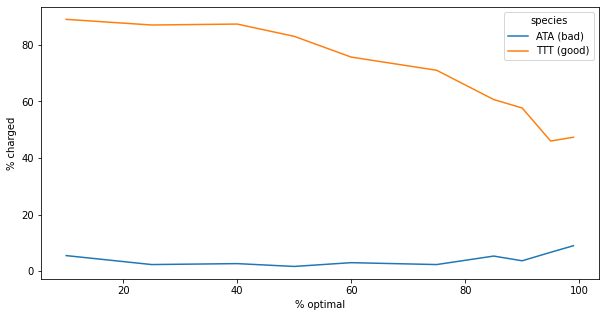

In [28]:
df_fil = df_master[(df_master.species == "TTT_charged") | (df_master.species == "ATA_charged")]
df_fil = df_fil.replace("TTT_charged", "TTT (good)")
df_fil = df_fil.replace("ATA_charged", "ATA (bad)")
sns.lineplot(x="percent_good", y="protein", hue="species", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("% charged")
#plt.savefig("figures_group_mtg_0128/two_codon_trnas.png")

Plotting charged tRNA fraction as a function of preferred codon use, we can see more clearly how the preferred tRNA is depleted exponentially (?), while the unpreferred tRNA abundance doesn't change substantially (although there is a slight increase between 80-100%). This results in an "S" shaped protein production curve, where protein production is limited by the suboptimal tRNA to begin with, then increases more rapidly as the optimal tRNA abundances becomes the primary driver. However, since the fraction of charged preferred tRNAs decreases sharply after 80% preferred codon use, increasing preferred codon use has diminishing returns after this point. 

Next, we would like to see which parameters control the shape of the protein production curve, which (we think) is sigmoidal.

## Changing the tRNA charging rate
An easy check is to see how the tRNA charging rate influences protein production (as a function of preferred codon use). Here, we keep the relative abundances of preferred/unpreferred tRNA species the same (9:1 preferred/unpreferred) and vary the charging rate uniformly with respect to each species. 

In [67]:
fractions = [10, 25, 40, 50, 60, 75, 85, 90, 95, 99]
rates = [10.0, 20.0, 50.0, 100, 200.0, 500.0, 1000.0]
df_master = None
for frac in fractions:
    for rate in rates:
        path = f"../output/two_codon/two_codon_fixed_transcript_{frac}_90_10_{rate}_{rate}_200_1200_5.0_10000.0"
        tmp = get_average_protein(path, frac, 500, 3)
        tmp["charging_rate"] = rate
        if df_master is not None:
            df_master = df_master.append(tmp, ignore_index=True)
        else:
            df_master = tmp
df_master

,species,protein,percent_good,charging_rate
0,ATA_charged,0.000000,10,20.0
1,ATA_uncharged,10.000000,10,20.0
2,TTT_charged,89.000000,10,20.0
3,TTT_uncharged,1.000000,10,20.0
4,__proteinX_rbs,193.000000,10,20.0
...,...,...,...,...
478,TTT_charged,83.333333,99,1000.0
479,TTT_uncharged,6.666667,99,1000.0
480,__proteinX_rbs,198.333333,99,1000.0
481,__ribosome,74.000000,99,1000.0


Text(0, 0.5, 'proteinX counts')

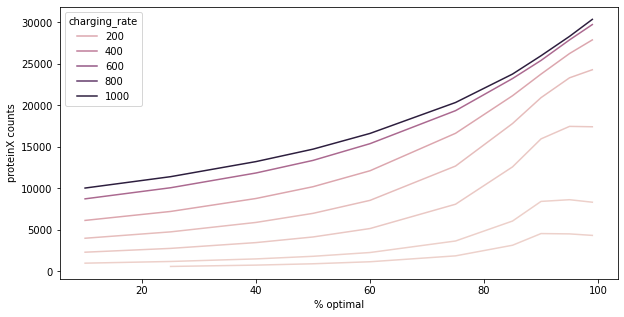

In [68]:
df_fil = df_master[(df_master.species == "proteinX")]
sns.lineplot(x="percent_good", y="protein", hue="charging_rate", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("proteinX counts")

Text(0, 0.5, 'charged preferred tRNA')

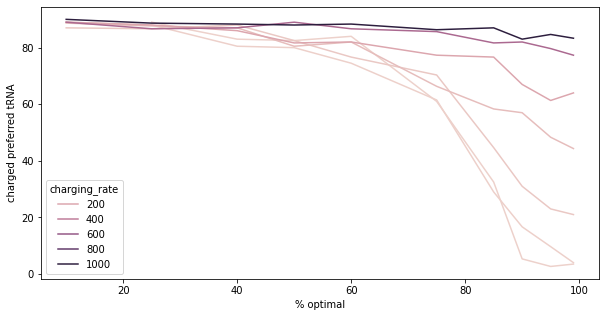

In [69]:
df_fil = df_master[(df_master.species == "TTT_charged")]
sns.lineplot(x="percent_good", y="protein", hue="charging_rate", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("charged preferred tRNA")

Text(0, 0.5, 'charged unpreferred tRNA')

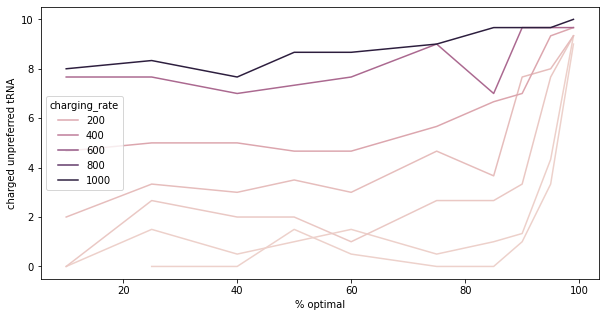

In [70]:
df_fil = df_master[(df_master.species == "ATA_charged")]
sns.lineplot(x="percent_good", y="protein", hue="charging_rate", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("charged unpreferred tRNA")

Text(0, 0.5, 'free ribosomes')

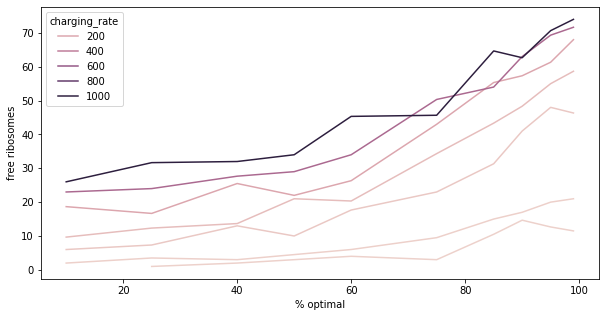

In [71]:
df_fil = df_master[(df_master.species == "__ribosome")]
sns.lineplot(x="percent_good", y="protein", hue="charging_rate", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("free ribosomes")

In [53]:
fractions = [10, 25, 40, 50, 60, 75, 85, 90, 95, 99]
rbs = [1000.0, 10000.0, 100000.0, 1000000.0]
df_master = None
for frac in fractions:
    for strength in rbs:
        path = f"../output/two_codon_var_rbs/two_codon_fixed_transcript_{frac}_90_10_50.0_50.0_200_1200_5.0_{strength}"
        tmp = get_average_protein(path, frac, 500, 3)
        tmp["strength"] = strength
        if df_master is not None:
            df_master = df_master.append(tmp, ignore_index=True)
        else:
            df_master = tmp
df_master

,species,protein,percent_good,strength
0,ATA_charged,3.000000,10,1000.0
1,ATA_uncharged,7.000000,10,1000.0
2,TTT_charged,90.000000,10,1000.0
3,TTT_uncharged,0.000000,10,1000.0
4,__proteinX_rbs,197.000000,10,1000.0
...,...,...,...,...
268,TTT_charged,13.666667,99,1000000.0
269,TTT_uncharged,76.333333,99,1000000.0
270,__proteinX_rbs,193.333333,99,1000000.0
271,__ribosome,0.000000,99,1000000.0


Text(0, 0.5, 'proteinX counts')

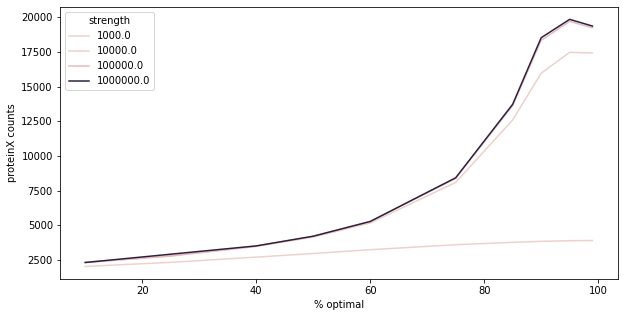

In [54]:
df_fil = df_master[(df_master.species == "proteinX")]
sns.lineplot(x="percent_good", y="protein", hue="strength", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("proteinX counts")

Text(0, 0.5, 'charged preferred tRNA')

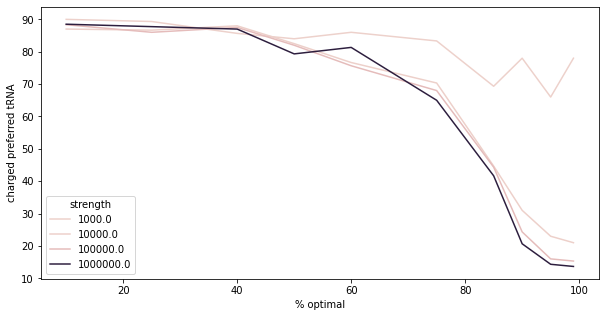

In [62]:
df_fil = df_master[(df_master.species == "TTT_charged")]
sns.lineplot(x="percent_good", y="protein", hue="strength", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("charged preferred tRNA")

Text(0, 0.5, 'charged unpreferred tRNA')

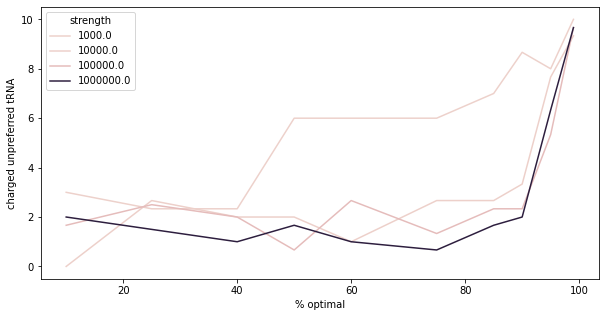

In [61]:
df_fil = df_master[(df_master.species == "ATA_charged")]
sns.lineplot(x="percent_good", y="protein", hue="strength", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("charged unpreferred tRNA")

Text(0, 0.5, 'free ribosomes')

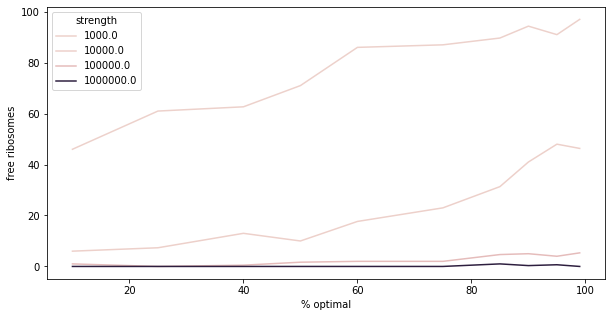

In [60]:
df_fil = df_master[(df_master.species == "__ribosome")]
sns.lineplot(x="percent_good", y="protein", hue="strength", data=df_fil)
plt.xlabel("% optimal")
plt.ylabel("free ribosomes")